In [1]:
# Bắt đầu thực hành thôi

In [2]:
import wget 
URL = "http://ovne.org/download/housing_price.csv"
response = wget.download(URL, "housing_price.csv")

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
df = pd.read_csv("housing_price.csv", header = 0, na_values="NA", comment = '\t', sep=',' ,skipinitialspace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   LotArea       1460 non-null   int64
 1   YearBuilt     1460 non-null   int64
 2   TotalBsmtSF   1460 non-null   int64
 3   1stFlrSF      1460 non-null   int64
 4   2ndFlrSF      1460 non-null   int64
 5   FullBath      1460 non-null   int64
 6   BedroomAbvGr  1460 non-null   int64
 7   TotRmsAbvGrd  1460 non-null   int64
 8   GarageArea    1460 non-null   int64
 9   GrLivArea     1460 non-null   int64
 10  MSSubClass    1460 non-null   int64
 11  OverallCond   1460 non-null   int64
 12  SalePrice     1460 non-null   int64
dtypes: int64(13)
memory usage: 148.4 KB


In [8]:
df.head()

,LotArea,YearBuilt,TotalBsmtSF,1stFlrSF,2ndFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd,GarageArea,GrLivArea,MSSubClass,OverallCond,SalePrice
0,8450,2003,856,856,854,2,3,8,548,1710,60,5,208500
1,9600,1976,1262,1262,0,2,3,6,460,1262,20,8,181500
2,11250,2001,920,920,866,2,3,6,608,1786,60,5,223500
3,9550,1915,756,961,756,1,3,7,642,1717,70,5,140000
4,14260,2000,1145,1145,1053,2,4,9,836,2198,60,5,250000


In [9]:
X = df.iloc[:, :12]
Y = df.iloc[:, 12]

In [10]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [11]:
from sklearn import tree

reg = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
reg.fit(X_train, Y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [12]:
y_pred = reg.predict(x_test)

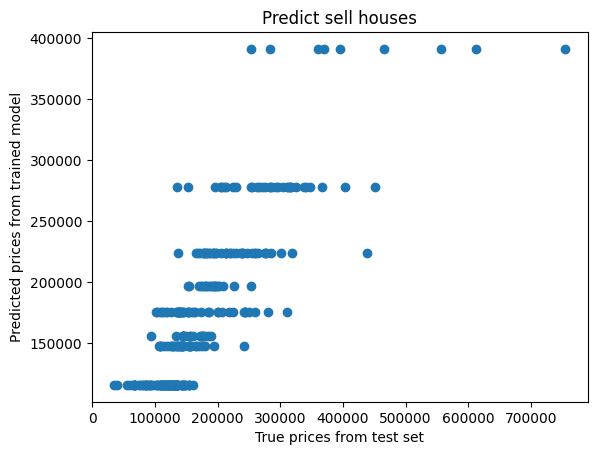

In [15]:
plt.scatter(y_test, y_pred)
plt.title("Predict sell houses")
plt.xlabel("True prices from test set")
plt.ylabel("Predicted prices from trained model")
plt.show()

In [17]:
# Eveluating

In [18]:
from sklearn.metrics import mean_absolute_error as MAE 
err = MAE(y_test, y_pred)
print("Mean absolute error of test set is:", err)

Mean absolute error of test set is: 33615.65025524834


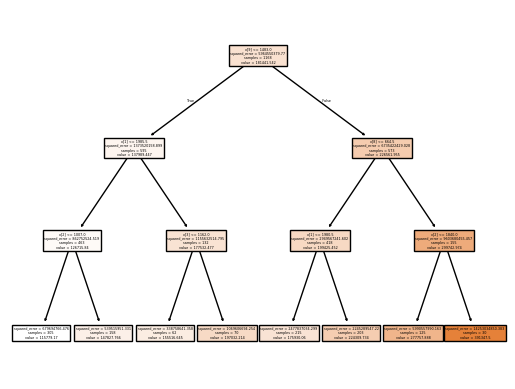

In [20]:
tree.plot_tree(reg, filled=True)
plt.savefig("out.pdf")
plt.show()

In [22]:
feat_importance = reg.feature_importances_

In [23]:
print("feat importance = " + str(feat_importance))

feat importance = [0.         0.11547937 0.09495624 0.01284048 0.         0.
 0.         0.         0.25784009 0.51888381 0.         0.        ]


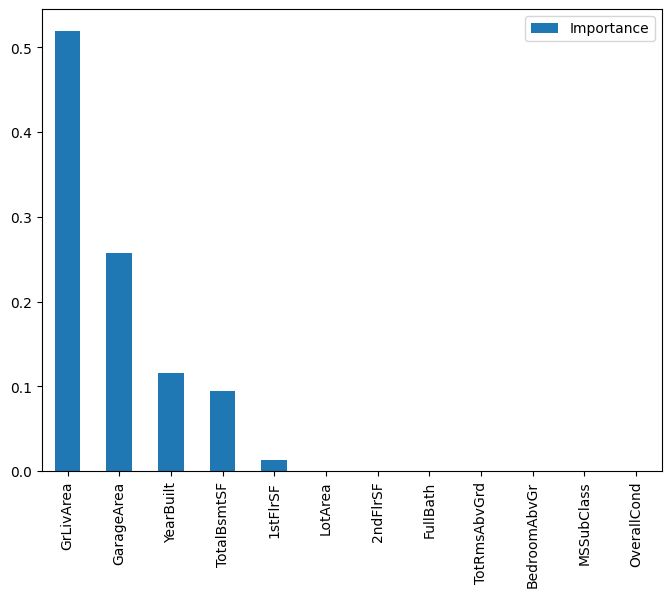

In [25]:
feat_importances = pd.DataFrame(reg.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace = True)
feat_importances.plot(kind='bar', figsize=(8, 6))
plt.show()

In [26]:
train_err = []
test_err = []
for depth in range(1, 10):
    reg = tree.DecisionTreeRegressor(max_depth = depth, random_state= 0)
    reg.fit(X_train, Y_train)
    Y_pred = reg.predict(X_train)
    y_pred = reg.predict(x_test)
    train_err.append(MAE(Y_train, Y_pred))
    test_err.append(MAE(y_test, y_pred))

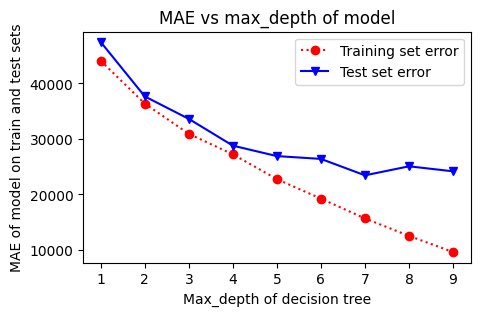

In [29]:
import numpy as np
x = np.linspace(1, 9, 9)
fig, ax = plt.subplots(figsize = (5, 3))
ax.plot(x, train_err, "o:r", label= "Training set error")
ax.plot(x, test_err, "v-b", label = "Test set error")
ax.set_xlabel("Max_depth of decision tree")
ax.set_ylabel("MAE of model on train and test sets")
ax.set_title("MAE vs max_depth of model")
ax.legend()
plt.show()

In [30]:
# Classification decision trees

In [ ]:
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state=0)

# Tự thực hành 

In [31]:
import wget 
URL = "http://ovne.org/download/iris_dataset.csv"
response = wget.download(URL, "iris_dataset.csv")

In [32]:
import pandas as pd
df = pd.read_csv("iris_dataset.csv", header = 0, na_values="NA", comment='\t', sep=',', skipinitialspace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class_name    150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [33]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
X = df.iloc[:, :4]
Y = df.iloc[:, 4]

In [36]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [38]:
# from sklearn import tree

# reg = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
# reg.fit(X_train, Y_train)
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3, random_state=42)
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [39]:
y_pre = clf.predict(x_test)

<BarContainer object of 30 artists>

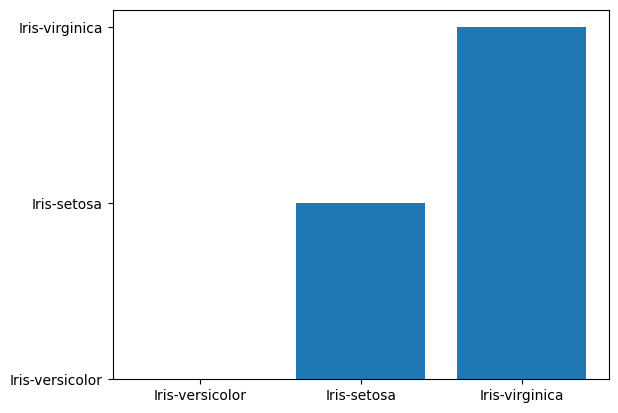

In [42]:
plt.bar(y_pre, y_test)


In [43]:
# Evaluating

In [45]:
# from sklearn.metrics import mean_absolute_error as MAE 
# err = MAE(y_test, y_pred)
# print("Mean absolute error of test set is:", err)
from sklearn.metrics import accuracy_score as AS 
err = AS(y_test, y_pre)
print("Accurace score of test set if:", err)

Accurace score of test set if: 1.0


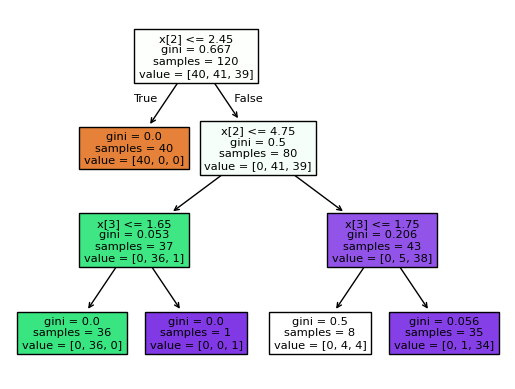

In [47]:
tree.plot_tree(clf, filled=True)
plt.savefig("out1.pdf")
plt.show()

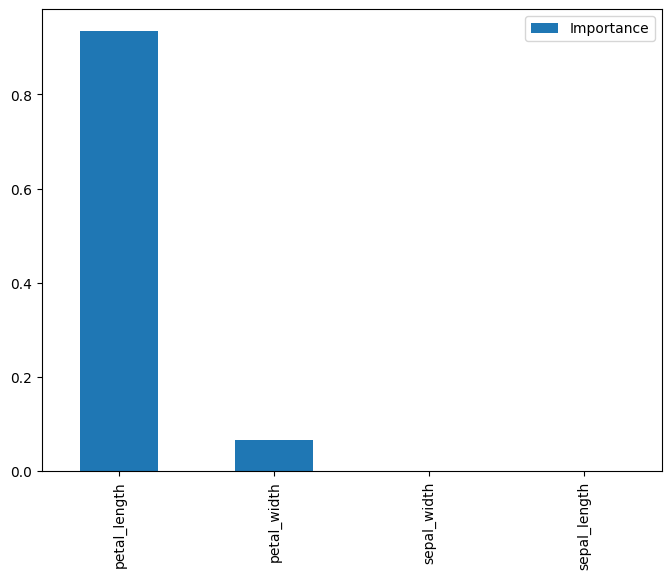

In [48]:
feat_importances = pd.DataFrame(clf.feature_importances_, index=X.columns, columns=["Importance"])
feat_importances.sort_values(by='Importance', ascending=False, inplace = True)
feat_importances.plot(kind='bar', figsize=(8, 6))
plt.show()

In [51]:
train_err = []
test_err = []
for depth in range(1, 10):
    clf = tree.DecisionTreeClassifier(max_depth = depth, random_state= 0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_train)
    y_pred = clf.predict(x_test)
    train_err.append(AS(Y_train, Y_pred))
    test_err.append(AS(y_test, y_pred))

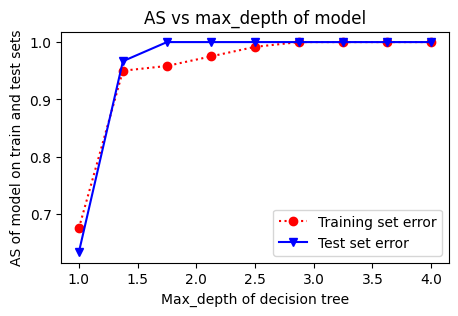

In [54]:
import numpy as np
x = np.linspace(1, 4, 9)
fig, ax = plt.subplots(figsize = (5, 3))
ax.plot(x, train_err, "o:r", label= "Training set error")
ax.plot(x, test_err, "v-b", label = "Test set error")
ax.set_xlabel("Max_depth of decision tree")
ax.set_ylabel("AS of model on train and test sets")
ax.set_title("AS vs max_depth of model")
ax.legend()
plt.show()

In [55]:
# ta đánh giá được mô hình ok nhất chỗ 1.5 hoạc nhưng max depth lớn